# Group Members:



<font color='blue'>**PUT NAMES OF YOUR TEAM MEMBERS HERE**

*   Luca Franceschi
*   Jan Corcho


# Guide

In this practice, we will cover the following topics:

* Linear Regression and
* Principal Components Analysis.

First we are
going to use least squares to "solve" an overdetermined system of equations,
arising in a parameter estimation problem. The second part of the practice is
about Principal Component Analysis, a linear method of dimensionality reduction.
We will see how this can be applied to face recognition.

\\

For any doubts before and after the practice, you can contact your teacher:

Nneka Okolo - nnekamaureen.okolo@upf.edu

Pablo Arias - pablo.arias@upf.edu

Adriano Pastore - adriano.pastore@upf.edu

\\

**Deadlines**: See
[P101](https://calendar.google.com/calendar/embed?src=c_b679939a9db8a1d8cd9f01f62d373d173f76794e4137c40e793a8d2cb11708f8%40group.calendar.google.com&ctz=Europe%2FMadrid/),
[P102](https://calendar.google.com/calendar/embed?src=c_5a65338fe8c3ce7909e62bb6b572b1a61ff4ad3543b12f72468e1a16bca41bd0%40group.calendar.google.com&ctz=Europe%2FMadrid),
[P201](https://calendar.google.com/calendar/embed?src=c_58aa336a0c5d0a38b13dd4a38071e7d8f9a18f4306ffeef2e48276087c339163%40group.calendar.google.com&ctz=Europe%2FMadrid),
[P202](https://calendar.google.com/calendar/embed?src=c_dac1d492e1060f3cee35420a9c2ff0d345e89a002cc8c70fe74bf0b78bf99d37%40group.calendar.google.com&ctz=Europe%2FMadrid),


\\

**Submission instructions**

Register your group members [here](https://forms.gle/NLeYqhN6LyPnSPg78) if you haven't already.

Complete the code and answer the questions below.

Export the notebook with the answers using the menu option File->Download .ipynb.

Rename exported notebook with the format **lastnameUid.ipynb** where lastname is the first surname of **Member 1** in the form and Uid is their UPF ID.

Submit your solution [here](https://forms.gle/AdYQwDEjAta1QaRY6) by the deadline. **Only one member needs to complete this step**.

You will receive an acknowledgement of receipt.

\\

**Grading**:

  The evaluation is based on results, conclusions and the commented code together.



[comment]: <> (Macros:)
$\newcommand{\ma}[1]{\boldsymbol{#1}}
\newcommand{\tras}[1]{#1^{\mathrm{T}}}
\newcommand{\herm}[1]{#1^{\mathrm{H}}}
\newcommand{\con}[1]{#1^{\mathrm{*}}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\tech}[1]{\overline{#1}}
\newcommand{\nspace}{\!\!\!\!}
\newcommand{\nmbr}[1]{\oldstylenums{#1}}
\newcommand{\eg}{\emph{e.g}. } \newcommand{\Eg}{\emph{E.g}. }
\newcommand{\ie}{\emph{i.e}. } \newcommand{\Ie}{\emph{I.e}. }
\newcommand{\cf}{\emph{c.f}. } \newcommand{\Cf}{\emph{C.f}. }
\newcommand{\etc}{\emph{etc}. } \newcommand{\vs}{\emph{vs}. }
\newcommand{\wrt}{w.r.t\onedot } \newcommand{\dof}{d.o.f. }
\newcommand{\etal}{\emph{et al}. }
\newcommand{\R}{\mathbb{R}}
\newcommand{\sign}{\mathrm{sign}}
\newcommand{\eps}{\varepsilon}
\newcommand{\To}{\longrightarrow}
\DeclareMathOperator*{\argmin}{arg\,min}
\DeclareMathOperator*{\argmax}{arg\,max}$

**Instructions for answering the questions.**

Questions are indicated in blue. Some questions require answers in the form of text, some others require completing code. See the examples below. *Please do not modify the notebook outside of these cells.*

<font color='blue'>**(QUESTION 42)** Based on what you know at this moment, answer these questions:
1. What are your favorite subjects?
2. What are your favourite hobbies?
</font>

<font color='red'>**ANSWER**</font>

1. I only like one subject: "Optimization Techniques."
1. I like writing equations $e^{i\pi} + 1 = 0$

<font color='blue'>**(QUESTION 43)** This is a coding question. There is no <font color='red'>**ANSWER**</font> cell. Instead, you should complete the code cell following the question. Typically, you'll find TODOs in the code indicating the places that you are expected to complete.
</font>

In [1]:
a = None     # TODO substitute the None by a nice number to print
print("The number a is {}".format(a))

The number a is None


# Part 1: Linear Regression

In [2]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# %matplotlib inline

In [3]:
# !sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

In [4]:
# Use latex in plots
plt.rcParams['text.usetex'] = True

Suppose we have $m$ samples $x_i,y_i\in\mathbb R$, $i = 1,\dots,m$, as shown in
Figure 1 below. Assume that we know that there is a functional
dependence between $x$ and $y$: $y = f(x)$. In general we do not know $f$, but
we know that it belongs to a certain class of functions (for example, we know
that the dependence between $x$ and $y$ should be logarithmic, or polynomial).
In order to approximate $f$, we
will use a *regression* technique.

In this Assignment, we will use linear regression to fit a polynomial of degree 3 to the data, given by:

$$\hat f(x) = w_0 + w_1 x + w_2x^2 + w_3 x^3.$$

Observe that $\hat f$ is not a linear function of $x$, but it is linear on the
coeffients $w_i$. The coefficients are unknowns we have to determine. We will do so by minimizing the sum of squared errors, between the predicted value $\hat f(x)$ and the measured value, $y$:

$$J(w_0,w_1,w_2,w_3) = \sum_{i = 1}^m |y_i - \hat f(x_i)|^2 = \sum_{i = 1}^m
\left|y_i - (w_0 + w_1 x_i + w_2x_i^2 + w_3 x_i^3)\right|^2$$

<>:20: SyntaxWarning: invalid escape sequence '\h'
<>:20: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipykernel_46359/164392308.py:20: SyntaxWarning: invalid escape sequence '\h'
  caption = 'Figure 1: The problem of regression. We want to fit a function $\hat f$ to\


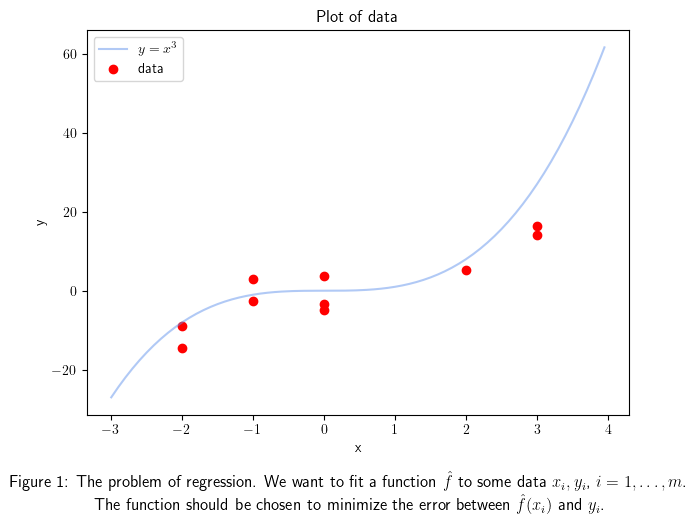

In [5]:
# Example data
m = 10
np.random.seed(4)

# Define x --> (m, 1)
x = np.random.randint(-2,3+1,(m,1))
y = np.power(x,3) - 0.9*np.power(x,2) + np.random.uniform(-5,5,(m,1))

fig, ax = plt.subplots(1, 1, figsize = (7, 5))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Plot of data")

ax.plot(np.arange(-3,4,0.05), np.power(np.arange(-3,4,0.05),3),
        label = "$y = x^3$", color = "cornflowerblue", alpha = 0.5)
ax.scatter(x, y, label = "data", color = "red")

plt.legend()

caption = 'Figure 1: The problem of regression. We want to fit a function $\hat f$ to\
 some data $x_i,y_i$, $i = 1,\dots,m$.\nThe function should be chosen to\
 minimize the error between $\hat{f}(x_i)$ and $y_i$.'
plt.figtext(0.5, -0.08, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

We can express $J$ in matrix notation as

$$J(\ma w) = \|\ma y - \ma \Phi \ma w\|^2$$

where $\ma y = [y_1,y_2,\dots,y_m]^T\in\mathbb R^m$, $\ma w = [w_0,w_1,w_2,w_3]^T\in\mathbb R^n$ ($n = 4$) and

$$\ma \Phi = \left[
\begin{array}{c c c c }
	1 & x_1 &  x_1^2 & x_1^3 \\
	1 & x_2 &  x_2^2 & x_2^3 \\
	\vdots & \vdots  & \vdots & \vdots \\
	1 &  x_m & x_m^2 & x_m^3 \\
\end{array}
\right]$$

is an $m\times n$ matrix, called the \emph{design matrix}. In general we will
have more measurements than parameters: $m >> n$.

We are going to compute the minimum of $J$ using two methods: the normal
equations and the SVD.

## Computing the minimum via the normal equations



We seek for the coefficient vector $\ma w^*$ which minimizes $J$:

$$\ma w^* = \argmin_{\ma w} J(\ma w) = \argmin_{\ma w} \|\ma \Phi \ma w - \ma y\|^2$$

As you saw in class, <font color='red'>if $\ma \Phi^T\ma \Phi$ is invertible</font>, the optimal coefficient vector $\ma w^*$ can be computed from the following equation:

\begin{equation}
\ma w^* = (\ma \Phi^T\ma \Phi)^{-1}\ma \Phi^T \ma y.
\end{equation}

These are the *normal equations*.  Recall that $\Phi\ma w^*$ is the projection of $\ma y$ over
$\text{Im}\ma \Phi$.

<font color='blue'>**TOY EXAMPLE.**

In [6]:
# Define the number of coefficients to calculate (components of w --> w = (w0, w1, ..., wn))
num_coefficients = 4

# Calculate Phi using x defined above
Phi = np.array((np.power(x, 0).T.flatten(), x.T.flatten(), np.power(x, 2).T.flatten(), np.power(x, 3).T.flatten())).T

In [7]:
print("Independent variable: \n",x,"\n\nDesign matrix:\n",Phi)

Independent variable: 
 [[ 0]
 [ 3]
 [-1]
 [-2]
 [-2]
 [ 0]
 [-1]
 [ 0]
 [ 2]
 [ 3]] 

Design matrix:
 [[ 1  0  0  0]
 [ 1  3  9 27]
 [ 1 -1  1 -1]
 [ 1 -2  4 -8]
 [ 1 -2  4 -8]
 [ 1  0  0  0]
 [ 1 -1  1 -1]
 [ 1  0  0  0]
 [ 1  2  4  8]
 [ 1  3  9 27]]


In [13]:
# Calculate w* using y defined above. First check that $Phi.TPhi$ is invertible.
if np.linalg.det(Phi.T@Phi) == 0:
  print('It is not invertible')
w_ast = np.invert(Phi.T@Phi) @ Phi.T @ y

In [14]:
print(f"w*:\n{w_ast}")

w*:
[[  -54509.8344928 ]
 [ -237953.22044923]
 [ -526231.40652787]
 [-1861382.81781176]]


<font color='blue'>**(QUESTION 1.1)** Complete the Python function "polyfit_inv_normal_eq" for computing $\ma w^*$. Follow the comments provided in the code.

In [ ]:
def polyfit_inv_normal_eq(x: np.ndarray,
                          y: np.ndarray,
                          n: int):
    """
    Fits a polynomial of degree n to a sets of samples x and y.
    The polynomial minimizes the sum of squared errors (least squares)
    solving the normal equations.

    :param x: m x 1, points in the x axis where the function is known
    :param y: m x 1, known values of the function at positions in x
    :param n: number of coefficients (degree of the polynomial + 1)

    :return w: n x 1, vector of polynomial coefficients
    :return Phi: m x n, data array
    """
    # TODO: create phi
    Phi = None ### WRITE YOUR SOLUTION

    # TODO: create w*
    w_ast = None ### WRITE YOUR SOLUTION

    return Phi, w_ast

In [ ]:
Phi, w_ast1 = polyfit_inv_normal_eq(x, y, num_coefficients)
print(f"$\Phi$:\n{Phi}\n\n$w*$:\n{w_ast1}")

$\Phi$:
None

$w*$:
None


<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipykernel_18023/4152631454.py:2: SyntaxWarning: invalid escape sequence '\P'
  print(f"$\Phi$:\n{Phi}\n\n$w*$:\n{w_ast1}")


<font color='blue'>**(QUESTION 1.2)**  Complete the Python function "polyfit_main", to
verify that the $\ma w^*$ returned by "polyfit_inv_normal_eq" satisfies
that the residue $r = \ma y - \ma \Phi \ma w^*$ is orthogonal to
$\text{Im}\ma \Phi$, \ie $r \perp \text{Im}\ma \Phi$.  Hint:
$\text{Im}\ma \Phi$ is the space generated by the columns of $\ma \Phi$.

In [ ]:
def polyfit_main(n_data_samples: int = 100,
                 polynomial_size: int = 4,
                 lower_data_value: int = -10,
                 higher_data_value: int = 10):
    """
    Fits a polynomial of degree n to a set of samples.

    :param n_data_samples: number of samples to be created
    :param polynomial_size: polynomial size (number of elements in array)
    :param lower_data_value: lowest value in data
    :param higher_data_value: highest value in data

    :return:
    """
    # TODO: create x
    x = None ### WRITE YOUR SOLUTION

    # TODO: create y to fit p(x) = w0 + w1 * x + w2 * x^2 + w3 * x ^ 3 + ... + wn * x ^ n --> n = polynomial_size
    y = None ### WRITE YOUR SOLUTION

    """Plot the data"""
    plt.figure()
    plt.plot(x, y, '.')
    plt.show()

    # TODO: Calculate w*
    w_ast = None ### WRITE YOUR SOLUTION

    # TODO: Calculate the residue and demostrate it is orthogonal to Phi
    residue = None ### WRITE YOUR SOLUTION
    scalar_product = None ### WRITE YOUR SOLUTION
    scalar_value = None ### WRITE YOUR SOLUTION
    print("Scalar product array: \n\n{}\n".format(scalar_product))
    print("Scalar product solution: {}".format(scalar_value))

In [ ]:
polyfit_main()

ValueError: x, y, and format string must not be None

Error in callback <function _draw_all_if_interactive at 0x7f2967f68040> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpc9vtjq1d 844f707e0917555faafa721cd5105dbd.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./844f707e0917555faafa721cd5105dbd.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on tmpc9vtjq1d/844f707e0917555faafa721cd5105dbd.log.




RuntimeError: latex was not able to process the following string:
b'lp'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpig_clxdy 844f707e0917555faafa721cd5105dbd.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./844f707e0917555faafa721cd5105dbd.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))

! LaTeX Error: File `type1cm.sty' not found.

Type X to quit or <RETURN> to proceed,
or enter new name. (Default extension: sty)

Enter file name: 
! Emergency stop.
<read *> 
         
l.7 \usepackage
               {type1ec}^^M
No pages of output.
Transcript written on tmpig_clxdy/844f707e0917555faafa721cd5105dbd.log.




<Figure size 640x480 with 1 Axes>

## Minimization with the SVD

Note that, for solving the normal equations using the closed form expression of $\ma w^*$ the matrix $\ma \Phi^T\ma \Phi$ needs to be
invertible. Let us now derive a different way to compute $\ma w^*$ based on
the Singular Value Decomposition (SVD), which can be extended even to the case
in which $\ma \Phi^T\ma \Phi$ is not invertible.  

Using the SVD decomposition, we can express
$$\ma \Phi = U S V^T$$
where $U\in \mathbb R^{m\times m}$ and $V\in \mathbb R^{n\times n}$ are orthogonal
matrices (a square matrix $A\in \mathbb R^{m\times m}$ is orthogonal when $A^T A =
A A^T = I_m$), and $S\in\mathbb R^{m\times n}$ is a rectangular diagonal
matrix. The diagonal values of $S$, $s_{ii} = \sigma_i > 0$, for $i = 1,\dots,q$
are the singular values. The number of singular values $q$ is the rank of $\ma
\Phi$, thus, $q \leqslant \min \{m,n\}$.

We will use the SVD to compute the \emph{pseudo-inverse} of $\ma \Phi$, $\ma
\Phi^\dagger$. Let us first recall what is the pseudo-inverse of a matrix, and
how it is computed.

### The Pseudo-inverse

We will define define pseudo-inverse in two steps: first we are going to define
the pseudo-inverse of a diagonal matrix. Then we are going to extend this
definition to any matrix.


*Pseudo-inverse of a diagonal matrix.* Let $S$ be an $m\times
n$ rectangular diagonal matrix. The pseudo-inverse of $S$, $S^\dagger$,
is also a diagonal matrix, but with dimensions $n\times m$. The diagonal elements
of $S^\dagger$ are computed as follows

$$s^\dagger_{ii} = \left\{
\begin{array}{l l}
	s_{ii}^{-1} & \text{if }s_{ii} \neq 0\\
	0 & \text{if }s_{ii} = 0,
\end{array}
\right.$$

for $i = 1,\dots, \min(m,n)$.

*Pseudo-inverse of any matrix.* Let $A$ be an $m\times n$
matrix. We define its pseudo-inverse based on the SVD decomposition and
the previous definition of the pseudo-inverse of a diagonal matrix. Using the
SVD decomposition we can express $A = USV^T$. We then define

$$A^\dagger = VS^\dagger U^T.$$

Note that $S$ is a diagonal matrix with the singular values on the diagonal, so
we already know how to compute its pseudo-inverse.

*Note.* The pseudo-inverse is a generalization of the inverse
which applies to any matrix (recall that only some square matrices are
invertible). If a matrix $A$ is invertible, we have that $S^\dagger = S^{-1}$.
The pseudo-inverse has many interesting properties. In the following we will
make use of one of them.

<font color='blue'>**(QUESTION 1.3)**  Generate a $5\times 3$ random matrix, $A$. Compute its
SVD $A = USV^T$ using the command "svd". Verify that the $U$ and $V$ are
orthogonal matrices and $S$ is diagonal. Verify that $A = USV^T$.

In [ ]:
# Generate 5×3  random matrix of type np.ndarray
A = None
print(A)

In [ ]:
# Compute its SVD
U, S, Vt = None### WRITE YOUR SOLUTION
print("U: \n\n{}\n\nS: \n\n{}\n\nVt: \n\n{}".format(U, S, Vt))

In [ ]:
# Verify that U and V are orthogonal
UTU = None ### WRITE YOUR SOLUTION
UUT = None ### WRITE YOUR SOLUTION
VTV = None ### WRITE YOUR SOLUTION
VVT = None ### WRITE YOUR SOLUTION

print("UTU\n\n{}\n\nUUT\n\n{}\n\nVTV\n\n{}\n\nVVT\n\n{}\n\nAre U and V orthogonal matrices? {}".format(UTU, UUT, VTV, VVT, np.allclose(UTU, UUT) and np.allclose(VTV, VVT)))

<font color='blue'>**(QUESTION 1.4a)** Compute the pseudo-inverse of $S$, $S^\dagger$. Use it
to compute the pseudo-inverse of $A$, $A^\dagger$. Verify that $A^\dagger A$
is the identity matrix of size $3$.

In [ ]:
# Compute pseudo-inverse of  𝑆
S_pinv = None ### WRITE YOUR SOLUTION
print(S_pinv)

In [ ]:
# Compute pseudo-inverse of  𝐴
A_pinv = None
print(A_pinv)

In [ ]:
# Verify that A†A is the identity matrix of size 3 of type np.ndarray
I_ = None ### WRITE YOUR SOLUTION
print("A†A:\n\n{}\n".format(I_))
print("A†A is the identity matrix of size 3?: {}".format(np.allclose(I_, np.identity(n = len(I_)))))

<font color='blue'>**(QUESTION 1.4b)** What happens with $AA^\dagger $?

<font color='red'>**ANSWER:**

### Solving least squares with the pseudo-inverse

It turns out that we can compute the solution $\ma w^*$ to the least squares
problem using the pseudo-inverse of the design matrix $\ma \Phi$ as follows:

$$\ma w^* = \ma \Phi^{\dagger}\ma y = VS^\dagger U^T\ma y.$$

<font color='blue'>**(QUESTION 1.5)** Complete the Python function "polyfit_svd_normal_eq" for computing $\ma w^*$. Follow the comments provided in the code.


In [ ]:
def polyfit_svd_normal_eq(x: np.ndarray,
                          y: np.ndarray,
                          n: int):
    """
    Fits a polynomial of degree n to a sets of samples x and y. The polynomial minimizes the sum
    of squared errors (least squares) using the pseudoinverse of data array.

    :param x: m x 1, points in the x axis where the function is known
    :param y: m x 1, known values of the function at positions in x
    :param n: number of coefficients (degree of the polynomial + 1)

    :return w_ast: n x 1, vector of polynomial coefficients
    :return Phi_pinv: n x m, pseudo-inverse of Phi
    :return Phi: m x n, data array
    """
    # TODO: Calculate Phi
    Phi = None ### WRITE YOUR SOLUTION
    # TODO: Calculate its SVD
    U, S, Vt = None, None, None ### WRITE YOUR SOLUTION

    # TODO: Calculate the pseudo-inverse of S
    S_pinv = None ### WRITE YOUR SOLUTION

    # TODO: Calculate w*
    Phi_pinv = None ### WRITE YOUR SOLUTION
    w_ast = None ### WRITE YOUR SOLUTION

    return Phi, Phi_pinv, w_ast

In [ ]:
Phi, Phi_pinv, w_ast2 = polyfit_svd_normal_eq(x, y, num_coefficients)
print(f"$\Phi$:\n{Phi}\n\n$\Phi^\dagger$:\n{Phi_pinv}\n\n$w*$:\n{w_ast2}")

<font color='blue'>**(QUESTION 1.6)** Compare with the solution obtained by inverting the
normal equations.

In [ ]:
print(f"Solution is similar with inverting normal equations: {np.allclose(w_ast1, w_ast2)}")

# Part 2: Principal Components Analysis

In this section we are going to explore the application of Principal Components
Analysis (PCA) for *dimensionality reduction*. Imagine we have a data set
formed by several (say $m$) points in $\mathbb R^n$, $\mathcal X =
\{x_1,\dots,x_m\}$. For example, in Figure 2 below we show a set of
points in $\mathbb R^2$. Another example, in the following section, the
"points" will be $m$ images of faces. Since the points are in $\mathbb R^n$
we are using $n$ coefficients to represent them. In many cases, we would be
interested in finding a representation of the dataset, which allows to encode
each point $x_i$ using $p << n$ coefficients.

Let us assume for simplicity that the points are centered at the origin (\ie
the mean or barycenter is at the origin: $\sum_i x_i = 0$). The idea behind PCA
is to approximate the point set by projecting it on a $p$ dimensional subspace
$V_p$, with $p \leqslant n$.

<figure>
  <img src="https://github.com/Muchay/OptTechCourse_Aux/blob/main/Lab1/images/PCA_img.png?raw=true" width="50%">
  <figcaption>Figure 2: PCA of a two dimensional point set. The principal directions $v_1,v_2$ form an orthogonal basis of $R^2$. Note that $v_1$ "aligns" with the point set: most of the variation of the points is along the direction $v_1$. These directions are chosen to minimize the mean squared projection error. In the Figure we show the projection errors over the principal direction $v_1$ for two points (red lines).</figcaption>
</figure>

To do that, we will build an orthonormal basis $\mathcal V_n =
\{v_1,v_2,\dots,v_n\}$ of $\mathbb R^n$, specially designed to adapt to the dataset (these
are the red vectors $v_1,v_2$ in Figure 2).

Any point $x_i$ from the data set can be expressed by its $n$ coordinates
on the basis:
$[\langle x_i,v_1\rangle,\dots,\langle x_i,v_n\rangle]^T\in\mathbb R^n$.  This means that we
can recover $x_i$ as
$$x_i = \sum_{j = 1}^n \langle x_i,v_j\rangle v_j.$$
If we only keep the first $p$ coefficients $[\langle x_i,v_1\rangle,\dots,\langle
x_i,v_p\rangle]^T$, we recover the projection of $x_i$ over $V_p$, the subspace
spanned by the first $p$ vectors in the basis:

$$P_{V_p} (x_i) = \sum_{j = 1}^p
\langle x_i,v_j\rangle v_j.$$

What we want to find is a basis that best approximates the dataset. Meaning that
for each $p \leqslant n$, $V_p$ is the $p$-dimensional vector space minimizing
the mean squared projection error

$$\frac1m\sum_{i = 1}^m \|P_{V_p}(x_i) - x_i\|^2.$$

The resulting vectors $v_1,\dots,v_n$ are called the \emph{principal
directions} of the set of points $\mathcal X= \{x_1,\dots,x_m\}$. For any
$x\in \mathbb R^n$, the coefficients $\langle x,v_1\rangle,\dots,\langle
x,v_n\rangle$ are called the \emph{principal components} of $x$.

## Computation and Properties of the Principal Components

<font color='blue'>**TOY EXAMPLE.**

Let us consider a data set $\mathcal X = \{x_1,\dots,x_m\}\subset \mathbb R^n$.
Let $\ma X$ be the data matrix: the rows of $\ma X$ are the vectors $x_i\in
\mathcal X$.

In [ ]:
# Define x --> (m, n)
m, n = 5, 3
x = None ### WRITE YOUR SOLUTION
print("X: \n\n{}\n".format(x))

# Calculate its mean
mu = None ### WRITE YOUR SOLUTION
print("Mean: {}\n".format(mu))

# Center X
x_centered = x - mu
print("X centered: \n\n{}\n".format(x_centered))

1.   The principal directions of $\mathcal X$ form an orthonormal basis
$v_1,\dots,v_n$ of $\mathbb R^n$ given by the eigenvectors of the
empirical covariance matrix $\frac1{m-1}\ma X^T\ma X$. Let $\lambda_1\geqslant
\lambda_2\geqslant \dots \geqslant \lambda_n \geqslant 0$ be the
corresponding eigenvalues.

In [ ]:
# Calculate the empirical covariance matrix of type np.ndarray
C = None ### WRITE YOUR SOLUTION
print("Covariance matrix: \n\n{}".format(C))

In [ ]:
# Define the number of p principal directions to be retrieved
p = 2 #TRY WITH p=n

# Compute the principal directions, sort them by lambda values (eigen values) and return only
# the p-first values
# 1. Get the eigen values and vectors
eigen_values, eigen_vectors = None, None ### WRITE YOUR SOLUTION

# 2. Sort them by eigen values and return only the p-first values
idx = None ### WRITE YOUR SOLUTION
eigen_values = None ### WRITE YOUR SOLUTION
eigen_vectors = None ### WRITE YOUR SOLUTION

In [ ]:
print("Eigen values: \n\n{}\n\nEigen vectors: \n\n{}".format(eigen_values, eigen_vectors))

2.   For $p = 1,\dots,n$, the subspace $V_p$ spanned by the first $p$
principal directions is the $p$-dimensional subspace which minimizes the
mean squared projection error:

$$\frac1m\sum_{i = 1}^m \|x_i - P_{V_p}(x_i)\|^2 = \sum_{j = p+1}^n \lambda_j.$$

3.   Equivalently $V_p$ is also the $p$-dimensional subspace that maximizes the
projection variance:

$$\frac1m\sum_{i = 1}^m \| P_{V_p}(x_i)\|^2 = \sum_{j = 1}^p \lambda_j$$

In [ ]:
# Calculate the projection variance
proj_var = None ### WRITE YOUR SOLUTION
print("Projection variance: \n\n{}".format(proj_var))

<font color='blue'>**(QUESTION 2.1)** Complete the Python function "pca_prin_dir" for
computing the $p$ first principal directions via the eigenvectors of $\frac1{m-1}\ma X^T\ma X$.  Follow the comments in the code.






In [ ]:
def pca_prin_dir(x: np.ndarray,
                 p: int):
    """
    Computes the principal directions, variances and mean of vectors in x.
    x is a row data array: its rows are vectors xi. The principal directions are given
    by eigenvectors of the empirical covariance matrix, x'*x.

    :param x: row data array, m x n
    :param p: number of principal directions

    :return eigen_vectors: principal direction array (each column is a PD) n x p
    :return eigen_values: eigenvalue diagonal array p x p
    :return mu: mean
    """
    # TODO: Calculate the mean of the incoming data and center x
    mu = None ### WRITE YOUR SOLUTION
    x_centered = None ### WRITE YOUR SOLUTION

    # TODO: Calculate the empirical covariance matrix
    C = None ### WRITE YOUR SOLUTION

    # TODO: Compute the principal directions and sort them by lambda values (eigen values) and return only
    # the p-first values
    # 1. Get the eigen values and vectors
    eigen_values, eigen_vectors = None, None ### WRITE YOUR SOLUTION

    # 2. Sort them by eigen values and return only the p-first values
    idx = None ### WRITE YOUR SOLUTION
    eigen_values = None ### WRITE YOUR SOLUTION
    eigen_vectors = None ### WRITE YOUR SOLUTION

    return eigen_vectors, eigen_values, mu

In [ ]:
eigen_vectors, eigen_values, mu = pca_prin_dir(x, p)
print("Eigen values: \n\n{}\n\nEigen vectors: \n\n{}\n\nMean: \n\n{}".format(eigen_values, eigen_vectors, mu))

<font color='blue'>**(QUESTION 2.2)** Complete the Python functions "pca_prin_comp" for
computing the $p$ first principal components $[\langle x,v_i \rangle]_{i =
1,\dots,p}$ of a point $x$.

In [ ]:
def pca_prin_comp(x: np.ndarray,
                  eigen_vectors: np.ndarray,
                  mu: np.ndarray = None):
    """
    Computes the principal components of vectors in x. x is a row data array: its rows are vectors xi.
    The principal components zi of a vector xi are given by the projection over the principal directions:

                            zi = [ <xi-mu,v1> <xi-mu,v2> ... <xi-mu,vp> ]

    :param x: row data array, m x n
    :param eigen_vectors: principal direction array (each column is a PD) n x p

    :return z : m x p, principal component array. Row i contains the princpal components of xi
    """
    # TODO: Calculate the raw data mean along row axis and center x
    if mu is None:
      mu = None ### WRITE YOUR SOLUTION

    x_centered = None ### WRITE YOUR SOLUTION

    # Project x over basis elements to compute principal components
    z = None ### WRITE YOUR SOLUTION

    return mu, z

In [ ]:
mu, z_p = pca_prin_comp(x = x,
              eigen_vectors = eigen_vectors)
print("Mean: \n\n{}\n\nPrincipal components: \n\n{}".format(mu, z_p))

<font color='blue'>**(QUESTION 2.3)** Complete the Python functions "pca_reconstruct" for
reconstructing a point $x$ from its principal components.

In [ ]:
def pca_reconstruct(z: np.ndarray([]),
                    eigen_vectors: np.ndarray([]),
                    mean: float):
    """
    Given a set of vectors z(i,:) (rows of array z) expressed in principal components, this function computes the x(i,:), 'inverting' the PCA change of coordinates.
    It goes from the low dimensional PCA representation to the high dimensional vectors.

    :param z: m x p, principal component array (row-wise).
    :param V: principal direction array (each column is a PD) n x p
    :param mu: mean

    :return x: row data array, m x n. Row x(i,:) is the high dimensional reconstruction from z(i,:)
    """
    # Calculate x_hat
    x_hat = None ### WRITE YOUR SOLUTION

    # Add the mean to recover the real array values
    x_ = None ### WRITE YOUR SOLUTION

    return x_

In [ ]:
pca_reconstruct(z = z_p, eigen_vectors = eigen_vectors, mean = mu)

## Example with a dataset

First we need some helper files:

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Move to your drive
%cd /content/drive/MyDrive/

In [ ]:
# Clone repo with auxilary files required for this and the following labs.
# This needs to be done only once for the course.
!git clone https://github.com/Muchay/OptTechCourse_Aux.git

In [ ]:
# Create source path
source = "/content/drive/MyDrive/OptTechCourse_Aux/Lab1/"

Next, we install and import required libraries, and import the dataset.

In [ ]:
# Install a widget that will allow you to build up interactive plots
# !conda install -c conda-forge ipympl -y

# If using JupyterLab
# !conda install -c conda-forge nodejs -y
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyter-matplotlib

# After run this lines, close the jupyter session and restore it

**1) Read the CSV file which contains the data and plot them**

In [ ]:
#pip install mpld3
#pip install ipympl

In [ ]:
# Import Pandas --> see https://pandas.pydata.org/
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import mpld3
import matplotlib.cm as cm
%matplotlib widget

In [ ]:
# Read the file
data = pd.read_csv(source+"data/point_cloud_r3.csv", sep = ",", header=None, names = ["x", "y", "z"])
data.head()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
# Plot the data
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', )
ax.scatter(data['x'], data['y'], data['z'], s=10, alpha=0.9, edgecolors='w', depthshade = False)
plt.xticks(list(range(int(data['x'].min()), int(data['x'].max()), 1)))
plt.yticks(list(range(int(data['y'].min()), int(data['y'].max()), 1)))
ax.set_zticks(list(range(int(data['z'].min()), int(data['z'].max()), 1)))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

<font color='blue'>**(QUESTION 2.4)** Four figures will open. Read the code and explain what each figure is showing.

<font color='red'>**ANSWER:**

**2) Compute principal all principal directions and the correspoding eigenvalues**

NOTE: in this example we are going to do some visualization of the principal components in IR^3. For that we will compute ALL principal directions and ALL principal components. Please note that this is not the typical way in which PCA is used. In a normal application of dimensionality reduction we would compute only a few principal directions and principal components

In [ ]:
# Define the number of principal directions
p = len(data.columns)

# Calculate the PCA principal directions for the given data
eigen_vectors, eigen_values, mu = pca_prin_dir(data.values, p)
print("Eigen values: \n\n{}\n\nEigen vectors: \n\n{}".format(eigen_values, eigen_vectors))

<font color='blue'>**(QUESTION 2.4a)** What can you tell from the eigenvalues about the geometry of the dataset?

<font color='red'>**ANSWER:**

<font color='blue'>**(QUESTION 2.4b)** Which is the number of components you would keep to hold at least the 95% of the variance?

In order to answer this question, we must represent the explained variance in terms of participation.

In [ ]:
# Calculate the participation in terms of %
tot = sum(eigen_values)
var_exp = [(i / tot)*100 for i in sorted(eigen_values, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Plot the graphic
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(len(eigen_values)), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(eigen_values)), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

<font color='red'>**ANSWER:**

<font color='blue'>**(QUESTION 2.4c)** How large would be the mean projection error we would commit by keeping only the first principal component?

In theory, MSE and eigenvalues are related by the following equation:

\begin{equation*}
\frac{1}{m}\sum^{n}_{i=1}\|x_{i}-P_{V_{p}}(x_{i})\|^{2}= \sum^{n}_{j=p+1}\lambda_{j}
\end{equation*}

Therefore, we will check that in both cases we achieve the same result.

In [ ]:
# Define the number of components to be kept
components = 2
components_array = list(range(components))

# Calculate the projection of x over the eigenvectors basis by only keeping the first component
mu, z = pca_prin_comp(x = data.values,
                      eigen_vectors = eigen_vectors)
projection = pca_reconstruct(z = z[:, components_array], eigen_vectors = eigen_vectors[:, components_array], mean = mu)

# Calculate the MSE
print("MSE for the first {} components: {}".format(components, np.power(data.values - projection, 2).sum() / (len(data) - 1)))

**Function definition**

In [ ]:
def calculate_projection_mse(x: np.ndarray,
                             eigen_vectors: np.ndarray,
                             z: np.ndarray,
                             p: np.ndarray,
                             mean: float):
    """
    Calculates the projection MSE

    :param x: row data array, m x n
    :param eigen_vectors: principal direction array (each column is a PD) n x p
    :param z: m x p, principal component array. Row i contains the princpal components of xi
    :param p: number of components to be used when projecting
    :param mu: mean

    :return:
    """
    # Define the number of components to be kept
    components_array = list(range(p))

    # Calculate the projection of x over the eigenvectors basis by only keeping the first component
    mu, z = pca_prin_comp(x = x,
                          eigen_vectors = eigen_vectors)
    projection = pca_reconstruct(z = z[:, components_array], eigen_vectors = eigen_vectors[:, components_array], mean = mean)

    # Calculate the MSE
    mse = np.power(x - projection, 2).sum() / (len(x) - 1)

    return mse

In [ ]:
components = 1
print("MSE for the first {} components: {}".format(components, calculate_projection_mse(x = data.values,
                                                                                        eigen_vectors = eigen_vectors,
                                                                                        z = z,
                                                                                        p = components,
                                                                                        mean = mu)))

<font color='red'>**ANSWER:**

<font color='blue'>**(QUESTION 2.4d)** And if we keep the first and the second?

In [ ]:
components = 2
print("MSE for the first {} components: {}".format(components, calculate_projection_mse(x = data.values,
                                                                                        eigen_vectors = eigen_vectors,
                                                                                        z = z,
                                                                                        p = components,
                                                                                        mean = mu)))

<font color='red'>**ANSWER:**

**3) Now plot the point cloud in 3D. Do three plots, in each of them will color the points with the value of one principal component (use the provided function plot_3d_and_components). Also plot the principal directions as vectors at the origin. The length of these vectors is proportional to the corresponding eigenvalue lambda.**

In [ ]:
def plot_3d_and_components(xs: np.ndarray,
                           ys: np.ndarray,
                           zs: np.ndarray,
                           means: np.ndarray,
                           principal_components: np.ndarray,
                           p: int,
                           eigen_vectors: np.ndarray = None,
                           color_map: list = []):
    """
    Plots a 3D graph and the PCA components

    :param xs: x-axis data
    :param ys: y-axis data
    :param zs: z-axis data
    :param means: means per axis
    :param eigen_vectors: eigenvectors
    :param principal_components: principal component array
    :param p: number of components to use
    :param color_map: color map to be used when representing
    """
    # Import libraries
    import matplotlib
    import inflect

    # Calculate the maximum and minimum values
    components = list(range(p))
    minimas = principal_components[:, components].min(axis = 0)
    maximas = principal_components[:, components].max(axis = 0)

    # Build up a object to convert from number to ordinal
    p = inflect.engine()

    # Build up the colors map and plot the figures
    fig = plt.figure(figsize=(10, 8))
    xticks = list(range(int(xs.min()), int(xs.max()), 1))
    yticks = list(range(int(ys.min()), int(ys.max()), 1))
    zticks = list(range(int(zs.min()), int(zs.max()), 1))
    for component in components:
        norm = matplotlib.colors.Normalize(vmin=minimas[component], vmax=maximas[component], clip=True)
        mapper = cm.ScalarMappable(norm=norm, cmap=color_map[component])
        color = [mapper.to_rgba(v)[0] for v in z[:, [component]]]

        # Plot the data
        ax = fig.add_subplot(1, len(components), component + 1, projection='3d')
        ax.scatter(xs, ys, zs, s=10, c = color, alpha=0.9, edgecolors='w', depthshade = False)
        if eigen_vectors is not None:
            for v in eigen_vectors.T:
                ax.plot([means[0] - v[0], v[0] + means[0]],
                        [means[1] - v[1], v[1] + means[1]],
                        [means[2] - v[2], v[2] + means[2]],
                        linewidth = 3,
                        color = "darkblue")
        ax.set_xticks(xticks)
        ax.set_yticks(yticks)
        ax.set_zticks(zticks)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        ax.set_title("Principal directions and {} principal component (color).".format(p.ordinal(component + 1)), fontdict = {"fontsize": 6})
    plt.show()

In [ ]:
plot_3d_and_components(xs = data.x,
                       ys = data.y,
                       zs = data.z,
                       means = mu,
                       eigen_vectors = eigen_vectors * eigen_values * 0.5,
                       principal_components = z,
                       p = 3,
                       color_map = [cm.gnuplot, cm.gnuplot, cm.gnuplot])

**4) Now let's do some dimensionality reduction. For that, we keep some of theprincipal components z.**

**a) Keep the first two principal components, project the points into a two dimensional vector space and calculate the projection error.**

In [ ]:
def plot_3d_and_projections(xs: np.ndarray,
                            ys: np.ndarray,
                            zs: np.ndarray,
                            xp: np.ndarray,
                            yp: np.ndarray,
                            zp: np.ndarray,
                            title: str = ""):
    """
    Plots a 3D graph and the PCA components

    :param xs: x-axis data
    :param ys: y-axis data
    :param zs: z-axis data
    :param xp: x-axis projection data
    :param yp: y-axis projection data
    :param zp: z-axis projection data
    """
    # Import libraries
    import matplotlib

    # Build up the colors map and plot the figures
    fig = plt.figure(figsize=(10, 8))
    xticks = list(range(int(xs.min()), int(xs.max()), 1))
    yticks = list(range(int(ys.min()), int(ys.max()), 1))
    zticks = list(range(int(zs.min()), int(zs.max()), 1))

    # Plot the data
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(xs, ys, zs, s=10, c = "darkblue", alpha=0.9, edgecolors='w', depthshade = False)
    ax.scatter(xp, yp, zp, s=10, c = "red", alpha=0.9, edgecolors='w', depthshade = False)
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    ax.set_zticks(zticks)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title, fontdict = {"fontsize": 6})
    plt.show()

**First and second components**

In [ ]:
# Calculate the projection of x over the eigenvectors basis by only keeping the first and second components
components_array = [0, 1]
mu, z = pca_prin_comp(x = data.values,
                      eigen_vectors = eigen_vectors)
projection = pca_reconstruct(z = z[:, components_array], eigen_vectors = eigen_vectors[:, components_array], mean = mu)
error_projection_fs = np.sqrt(np.power(data.values - projection, 2).sum(axis = 1))

# Plot the projection
plot_3d_and_projections(xs = data.x,
                        ys = data.y,
                        zs = data.z,
                        xp = projection[:, 0],
                        yp = projection[:, 1],
                        zp = projection[:, 2],
                        title = "Real data versus projection over the first and second components")

**b) Keep the first and third principal components, project the points into a two dimensional vector space and calculate the projection error.**

In [ ]:
# Calculate the projection of x over the eigenvectors basis by only keeping the first and second components
components_array = [0, 2]
mu, z = pca_prin_comp(x = data.values,
                      eigen_vectors = eigen_vectors)
projection = pca_reconstruct(z = z[:, components_array], eigen_vectors = eigen_vectors[:, components_array], mean = mu)
error_projection_ft = np.sqrt(np.power(data.values - projection, 2).sum(axis = 1))

# Plot the projection
plot_3d_and_projections(xs = data.x,
                        ys = data.y,
                        zs = data.z,
                        xp = projection[:, 0],
                        yp = projection[:, 1],
                        zp = projection[:, 2],
                        title = "Real data versus projection over the first and third components")

**5) Plot the low dimensional representative z in IR^2 and color them with the projection error. Look at the colorbars to compare the error in both plots.**

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 8), ncols=2)
sc = ax1.scatter(z[:, 0] , z[:, 1], s=10, c = error_projection_fs, alpha=0.9, edgecolors='w')
plt.colorbar(sc, ax = ax1)
ax1.set_title("First and second Principal Components")
sc = ax2.scatter(z[:, 0] , z[:, 2], s=10, c = error_projection_ft, alpha=0.9, edgecolors='w')
plt.colorbar(sc, ax = ax2)
ax2.set_title("First and third Principal Components")
plt.show()

<font color='blue'>**(QUESTION 2.4e)** Which 2D subspace approximates better the original points?

<font color='red'>**ANSWER**

## Eigenfaces: application of PCA for face recognition

We are going to apply PCA to reduce the dimensionality in a face recognition
application. For this we are going to use the functions you completed.

The objective is to recognize a person among a reduced set of
people, given a frontal picture of his face. The data we have is a data base of
$m$ images of faces from different persons, in different positions,
expressions and illumination conditions. The images are in gray scale, of size
$n=211\times 219$.  We consider them as vectors in $\mathbb R^{48319}$, a high
dimensional space.

<figure>
  <img src="https://github.com/Muchay/OptTechCourse_Aux/blob/main/Lab1/images/faces_img.png?raw=true" width="50%">
  <figcaption>Figure 3: Some of the images used for the face recognition application.</figcaption>
</figure>



We will apply PCA to reduce the dimensionality of the space to $p$ (we will try
different values for $p$). We will proceed as follows.

### Off-line stage: learning the principal directions

We consider now that $\mathcal X = \{x_1,\dots,x_m\}$ are the face images in
vector form.


1.   Compute the first $p$ eigenvectors and eigenvalues of $\frac1{m-1}\ma X^T\ma X$. Let $\ma V_p$ be the matrix whose columns are these eigenvectors (the principal directions)
2.   For each $x_i\in\mathcal X$, compute its $p$ first principal components:
This can be done with the following matrix multiplication: $$\ma Z = \ma X \ma V_p,$$ where the $i$th row of $\ma Z$, denoted by $z_i$, are the principal
components of the face $x_i$. $z_i$ is the low dimensional representative of $x_i.$

### On-line stage: recognition with principal components

The objective now is to recognize a new face $x$. Again, $x$ is a grayscale
image of the face, considered as a vector. To simplify the algorithm, we assume
that $x$ is an image from a person of the dataset. Our recognizer is a very simple nearest
neighbor classifier.

1.   Compute the principal components of $x$, $$z = [\langle x, v_1\rangle, \langle x, v_2\rangle, \dots, \langle x, v_p\rangle].$$

2. Look in the database for the face with nearest principal	components:
$$j^* = \argmin_j \|z - z_j\|^2.$$


<font color='blue'>**(QUESTION 2.5a)** The code for this part is provided. Run the provided functions and Read their code and comments and explain what each of these functions do, and the figures that open.

This is the first script of the face recognition application. The idea here is to run a very simple face recognition algorithm, but using PCA to reduce the dimensionality of the vectors. The original vectors are images of 211 x 229. If we consider the images as vectors in IR^n (each pixel is a component of the vector), we have that n = 221x229 = 48319. Using PCA, we will reduce the dimensionality to ~ 50, 1000 times smaller!!!

In [ ]:
# In case needed:
#!conda install -c anaconda pillow -y

In [ ]:
from PIL import Image
import os

**1) Load faces from image files**

Images are in data/faces folder. We will load them and store them as rows in a data matrix

In [ ]:
# List all images and read them. Once read, reshape them into (1, W x H)
faces_dir = os.path.abspath(source+"data/faces")
faces_files = [file_ for file_ in os.listdir(faces_dir) if file_.endswith("png")]
faces_shape = np.array(Image.open(os.path.join(faces_dir, faces_files[0]))).shape
faces = np.empty((len(faces_files), faces_shape[0] * faces_shape[1]))
for index, img in enumerate(faces_files):
    im_frame = Image.open(os.path.join(faces_dir, img))
    np_frame = np.array(im_frame)
    faces[index] = np_frame.reshape((1, faces_shape[0] * faces_shape[1]))

**2) Split data randomly into a train set (tr), and a test set (ts)**

Leave a part of the data set to test. The test data set are faces we will try to recognize.

The sizes will be $80\%$ for training and $20\%$ for testing

In [ ]:
import random

In [ ]:
# Get the training and testing faces indexes
seed_value = None
np.random.seed(seed_value)
test_faces_idx = random.sample(list(range(len(faces))), k = int(len(faces) * 0.205))
train_faces_idx = list(set(list(range(len(faces)))).difference(set(test_faces_idx)))

# Build up the training and testing faces
test_faces = faces[test_faces_idx, :]
train_faces = faces[train_faces_idx, :]

In [ ]:
len(train_faces)

**3) Train PCA model**

Now we will compute the principal directions using the training set.

**Note:** the covariance matrix is too large to fit in memory. We can circumvent this problem using the SVD of x. Recall that the eigenvectors of $X^{T}X$ correspond to the right singular vectors (columns of $V$) satisfying:

$$X = USV^{T}.$$

So that,

$$X^{T}X = VS^{T}U^{T}USV^{T} = VS^{T}SV^{T}.$$

However, this does not work either. We have the same problem! The size of $V$ does not fit in memory. This is not surprising, both $X^{T}X$ and $V$ are n x n matrices.

We can solve this problem with the economic size SVD. Note that $n - m$ columns of $V$ are multiplied by the zeros of $S$, in the product $USV^{T}$. This means that we can remove these columns. The economic size SVD is the following:

$$X = US_0V_0^{T},$$

where $S_0$ is $m$ x $m$ and $V_0$ is $n$ x $m$. The same can be done with the $U$ matrix in the case $m$ > $n$.

We want to reduce $V$, not $U$. We can solve this problem very easily, by computing the svd of $X^{T}$. It can be shown that if

$$X = USV^{T},$$

is the SVD of $X$, then the svd of $X^{T}$ is given by

$$X^{T} = VS^{T}U^{T}.$$

The same happens with the economic size svd. Thus we will compute $V_0$ via the economic svd of $X^{T}$.

In [ ]:
# Define P
p = len(train_faces)

# Calculate the SVD of x' (x = x - mean(x))
U, S, Vt = np.linalg.svd((train_faces - train_faces.mean(axis = 0)).T, full_matrices=False)

# Keep only the first p
V  = U[:, :p]
S = np.diag(S)[:p, :p]

# The eigenvalues of x'*x are the square of the singular values
S = np.power(S, 2)

**4) Visualize the PCA results**

In [ ]:
# Calculate the participation in terms of %
tot = sum(np.diag(S))
var_exp = [(i / tot)*100 for i in sorted(np.diag(S), reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# Plot the graph
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    plt.bar(range(len(np.diag(S))), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(len(np.diag(S))), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

As you can see in graph above, by using the first 50 principal components we can keep almost the $90\%$ of the total variance. Let's take a look at the *mean face*

In [ ]:
# Define the number of principal components to keep
p = 50

# Keep only the first p principal directions
V_p = V[:, :p]
S_p = S[:p, :p]

# Plot the mean face
plt.figure()
plt.imshow(train_faces.mean(axis = 0).reshape(faces_shape), cmap = "gray")
plt.show()

And now build a big image with the 6 first principal directions


In [ ]:
# Build up the images array
num_rows = 2
num_columns = 3
tmp = np.empty(shape = (faces_shape[0] * num_rows, faces_shape[1] * num_columns))
component_index = 0
for row in range(num_rows):
    for column in range(num_columns):
        tmp[faces_shape[0] * row: faces_shape[0] * (row + 1), faces_shape[1] * column: faces_shape[1] * (column + 1)] = (S_p[component_index, component_index] * V_p[:, component_index]).reshape(faces_shape)
        component_index += 1

# Plot the images
plt.figure()
plt.imshow(tmp, cmap = "gray")
plt.show()

**5) project a test face over principal directions**

In [ ]:
# Keep one of the test faces
x = test_faces[0, :]

# Build up the principal components
_, z = pca_prin_comp(x = x, eigen_vectors = V_p, mu = train_faces.mean(axis = 0));

# Reconstruct the face
x_proj = pca_reconstruct(z = z, eigen_vectors = V_p, mean = train_faces.mean(axis = 0))

# Show both faces
fig, (ax1, ax2) = plt.subplots(figsize=(8, 6), ncols=2)
ax1.imshow(x.reshape(faces_shape), cmap = "gray")
ax1.set_title("Test image")
ax2.imshow(x_proj.reshape(faces_shape), cmap = "gray")
ax2.set_title("Projected image")
plt.show()

**6) Recognize faces**

This a very simple face recognition algorithm: it is based on comparing the PCA coordinages of a query face with those of the training set.

In [ ]:
# Import a library to simulate time steps
import time
%matplotlib inline

# Define the number of principal components to keep
p = 50

# Keep only the first p principal directions
V_p = V[:, :p]
S_p = S[:p, :p]

# Compute principal components for training faces
_, train_z = pca_prin_comp(x = train_faces, eigen_vectors = V_p, mu = train_faces.mean(axis = 0))

# Compute principal components for test faces
_, test_z = pca_prin_comp(x = test_faces, eigen_vectors = V_p, mu = train_faces.mean(axis = 0))

# Classify
nn_idx = []
for i in range(len(test_faces)):
    d = np.linalg.norm(np.tile(test_z[[i], :], (train_z.shape[0], 1)).T - train_z.T, axis = 0).T
    nn_idx.append(int(d.argmin()))

# Visualize classification results
plt.figure()
plt.ion()
for i in range(len(test_faces)):
    print("Showing image {} of {}".format(i + 1, len(test_faces)))
    plt.subplot(1, 2, 1).imshow(test_faces[i, :].reshape(faces_shape), cmap = "gray")
    ax1.set_title("Test image")
    plt.subplot(1, 2, 2).imshow(train_faces[nn_idx[i], :].reshape(faces_shape), cmap = "gray")
    ax2.set_title("Training image")
    plt.show()
    plt.pause(1)

<font color='red'>**ANSWER**

<font color='blue'>**(QUESTION 2.5b)** Try changing the number of principal components used in step 6 and comment how this affects to the number of classification errors.

<font color='red'>**ANSWER**

In [ ]:
output.disable_custom_widget_manager()